# <font color="red">Hackday - Dados Inglórios</font>

## Planejamento da Solução

### Input

**Problema de Negócio**

A inclusão financeira continua a ser um dos principais obstáculos ao desenvolvimento econômico e humano na África. Por exemplo, no Quênia, Ruanda, Tanzânia e Uganda, apenas 9,1 milhões de adultos (14% dos adultos), têm acesso ou usam uma conta bancária comercial.

Em 2008, o nível de inclusão financeira na África Subsaariana era de pouco mais de 23%. Em 2018, esse número quase dobrou. No Togo, Mazamesso Assih, ministro de finanças, coordena uma estratégia de inclusão financeira com bancos parceiros. Ele afirma que garantir acesso a serviços financeiros básicos para a população, é fundamental para impulsionar a economia Africana.

Em 2022, conforme destacado no último relatório do Banco Central da África Ocidental, atingiu-se uma das mais altas taxas de inclusão financeira da região, próxima de 82%. Uma parcela significativa desse aumento veio do aumento dos serviços financeiros digitais.

Assih afirma também, que existem três razões principais pelas quais as nações africanas devem apostar na inclusão financeira:

 1. Tornar os serviços financeiros mais acessíveis promove o empoderamento das pessoas mais vulneráveis, especialmente as mulheres.
 2. Combater redes criminosas, passar de uma economia exclusivamente monetária para uma infraestrutura financeira digital torna mais fácil para as autoridades rastrear transações e lidar com contrabandistas e traficantes.
 3. impulsionará a conectividade dos setores público e privado para um crescimento sustentável, apoiando as start-ups africanas.
 
O objetivo desta competição é criar um modelo de aprendizado de máquina para prever quais indivíduos vão ou não utilizar uma conta bancária. Os modelos e soluções desenvolvidos devem fornecer uma indicação do estado da inclusão financeira no Quênia, Ruanda, Tanzânia e Uganda.



**Dados**

Os dados necessários podem ser encontrados no [repositório da atividade](https://www.kaggle.com/c/inclusao-financeira-na-africa). No arquivo train.csv você encontrará:

|Feature|Descrição|
|:------|:--------|
|country| Pais de Origem.
|year| Ano da Inclusão
|uniqueid| Id do Usuário.
|bank_account| Possui ou Não a Conta no Banco.
|location_type| Tipo de Localidade (Rural...)
|cellphone_access| Possui ou Não Celular.
|household_size| Tamanho da Casa.
|age_of_respondent| Idade do Usuário.
|gender_of_respondent| Gênero do Usuário.
|relationship_with_head| Status com o Dono da Conta.
|marital_status| Situação Civil.
|education_level| Nível de Educação.
|job_type| Tipo de Trabalho.

### Output

Um arquivo CSV com a previsão do modelo dizendo quais clientes abrirão uma conta digital em duas colunas:  

|uid|	bank_account|
|:--|:--------------|
|Rwanda_uniqueid_625|	No|
|Rwanda_uniqueid_1561|	No|
|Rwanda_uniqueid_4806|	No|
|Tanzania_uniqueid_4902|	Yes|
|Rwanda_uniqueid_980|	No|
|Rwanda_uniqueid_7043|	No|

### Tasks

- Descrição dos Dados
    - Renomear colunas
    - Checar dimenões
    - Checar tipos
    - Alterar tipos
    - Checar vazios
    - Preencher os vazios
    - Descrições Estatísticas

- Feature Engineering
    - Mapa de hipóteses
    - Criação de hipóteses
- Seleção de features (Filtro)
- EDA
    - Univariada
    - Bivariada (teste de hipóteses)
    - Multivariadas
- Preparação dos dados
    - Rescala das features
- Seleção de features
- Construção do modelo
    - modelos de classificação
    - guideline
- Avaliação do modelo
- Fine Tuning
- CSV Final

## 0. Settings

### 0.1. Imports

In [18]:
# manipulação de dados
import pandas as pd
import numpy as np

# visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

# scikit-learn
from sklearn import model_selection as ms
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### 0.2. Helper Functions

In [19]:
def freq_analysis(df, feature):
    count = df[feature].value_counts()
    mapper = dict()
    for ind in count.index:
        mapper[ind] = count[ind]

    feature_map = df2[feature].map(mapper)
    
    return feature_map

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 40
    
    display(HTML('<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
    sns.set()

jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.3. Data Loading

In [20]:
train_file = './data/train.csv'

df_raw = pd.read_csv(train_file)
df_raw.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,Rwanda,2016,uniqueid_4858,Rural,Yes,6,45,Male,Head of Household,Divorced/Seperated,Primary education,Farming and Fishing,Rwanda_uniqueid_4858,No
1,Tanzania,2017,uniqueid_3015,Urban,No,4,33,Female,Head of Household,Single/Never Married,Primary education,Self employed,Tanzania_uniqueid_3015,No
2,Rwanda,2016,uniqueid_103,Rural,Yes,7,43,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,Rwanda_uniqueid_103,No
3,Rwanda,2016,uniqueid_4582,Rural,No,6,35,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing,Rwanda_uniqueid_4582,No
4,Tanzania,2017,uniqueid_2854,Urban,Yes,2,30,Male,Head of Household,Single/Never Married,Primary education,Informally employed,Tanzania_uniqueid_2854,No


## 1. Descrição dos Dados

In [21]:
df1 = df_raw.copy()

In [22]:
df1['country'].unique()

array(['Rwanda', 'Tanzania', 'Kenya', 'Uganda'], dtype=object)

In [23]:
df1['location_type'].unique()

array(['Rural', 'Urban'], dtype=object)

In [24]:
df1['relationship_with_head'].unique()

array(['Head of Household', 'Spouse', 'Child', 'Parent', 'Other relative',
       'Other non-relatives'], dtype=object)

In [25]:
df1['marital_status'].unique()

array(['Divorced/Seperated', 'Single/Never Married',
       'Married/Living together', 'Widowed', 'Dont know'], dtype=object)

In [26]:
df1['education_level'].unique()

array(['Primary education', 'Secondary education',
       'Vocational/Specialised training', 'Tertiary education',
       'No formal education', 'Other/Dont know/RTA'], dtype=object)

### 1.1. Renomear features

### 1.2. Checar Dimensões

### 1.3. Checar Tipos

### 1.4. Alterar Tipos

### 1.5. Checa NaN

In [27]:
df1.isna().sum()

country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
uid                       0
bank_account              0
dtype: int64

### 1.6. Preenche NaN

### 1.7. Estatística Descritiva

## 2. Feature Engineering

In [28]:
df2 = df1.copy()

In [29]:
df2.dtypes

country                   object
year                       int64
uniqueid                  object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
uid                       object
bank_account              object
dtype: object

### 2.1. Mapa de Hipóteses

### 2.2. Criação de Hipóteses

**H1.** Os países desenvolvidos tem 10% a mais de contas digitais  
**H2.** Zonas urbanas tem 50% a mais de contas digitais do que zonas rurais  
**H3.** 80% das pessoas que possuem celular e internet tem conta digital  
**H4.** A quantidade de contas de pessoas com ensino superior é maior em média do que as demais  
**H5.** Pessoas entre 18 e 40 anos constituem 85% da base de contas digitais  
**H6.** Mulheres são a maioria entre as contas digitais abertas  
**H7.** Pessoas acima dos 60 anos mesmo com acesso ao celular não possuem conta digital  
**H8.** 95% das pessoas sem trabalho não possuem conta digital  
**H9.** 100% dos chefes de família possuem conta digital

## 3. Seleção de Features

In [30]:
df3 = df2.copy()

## 4. EDA

In [31]:
df4 = df3.copy()

### 4.1. Univariada

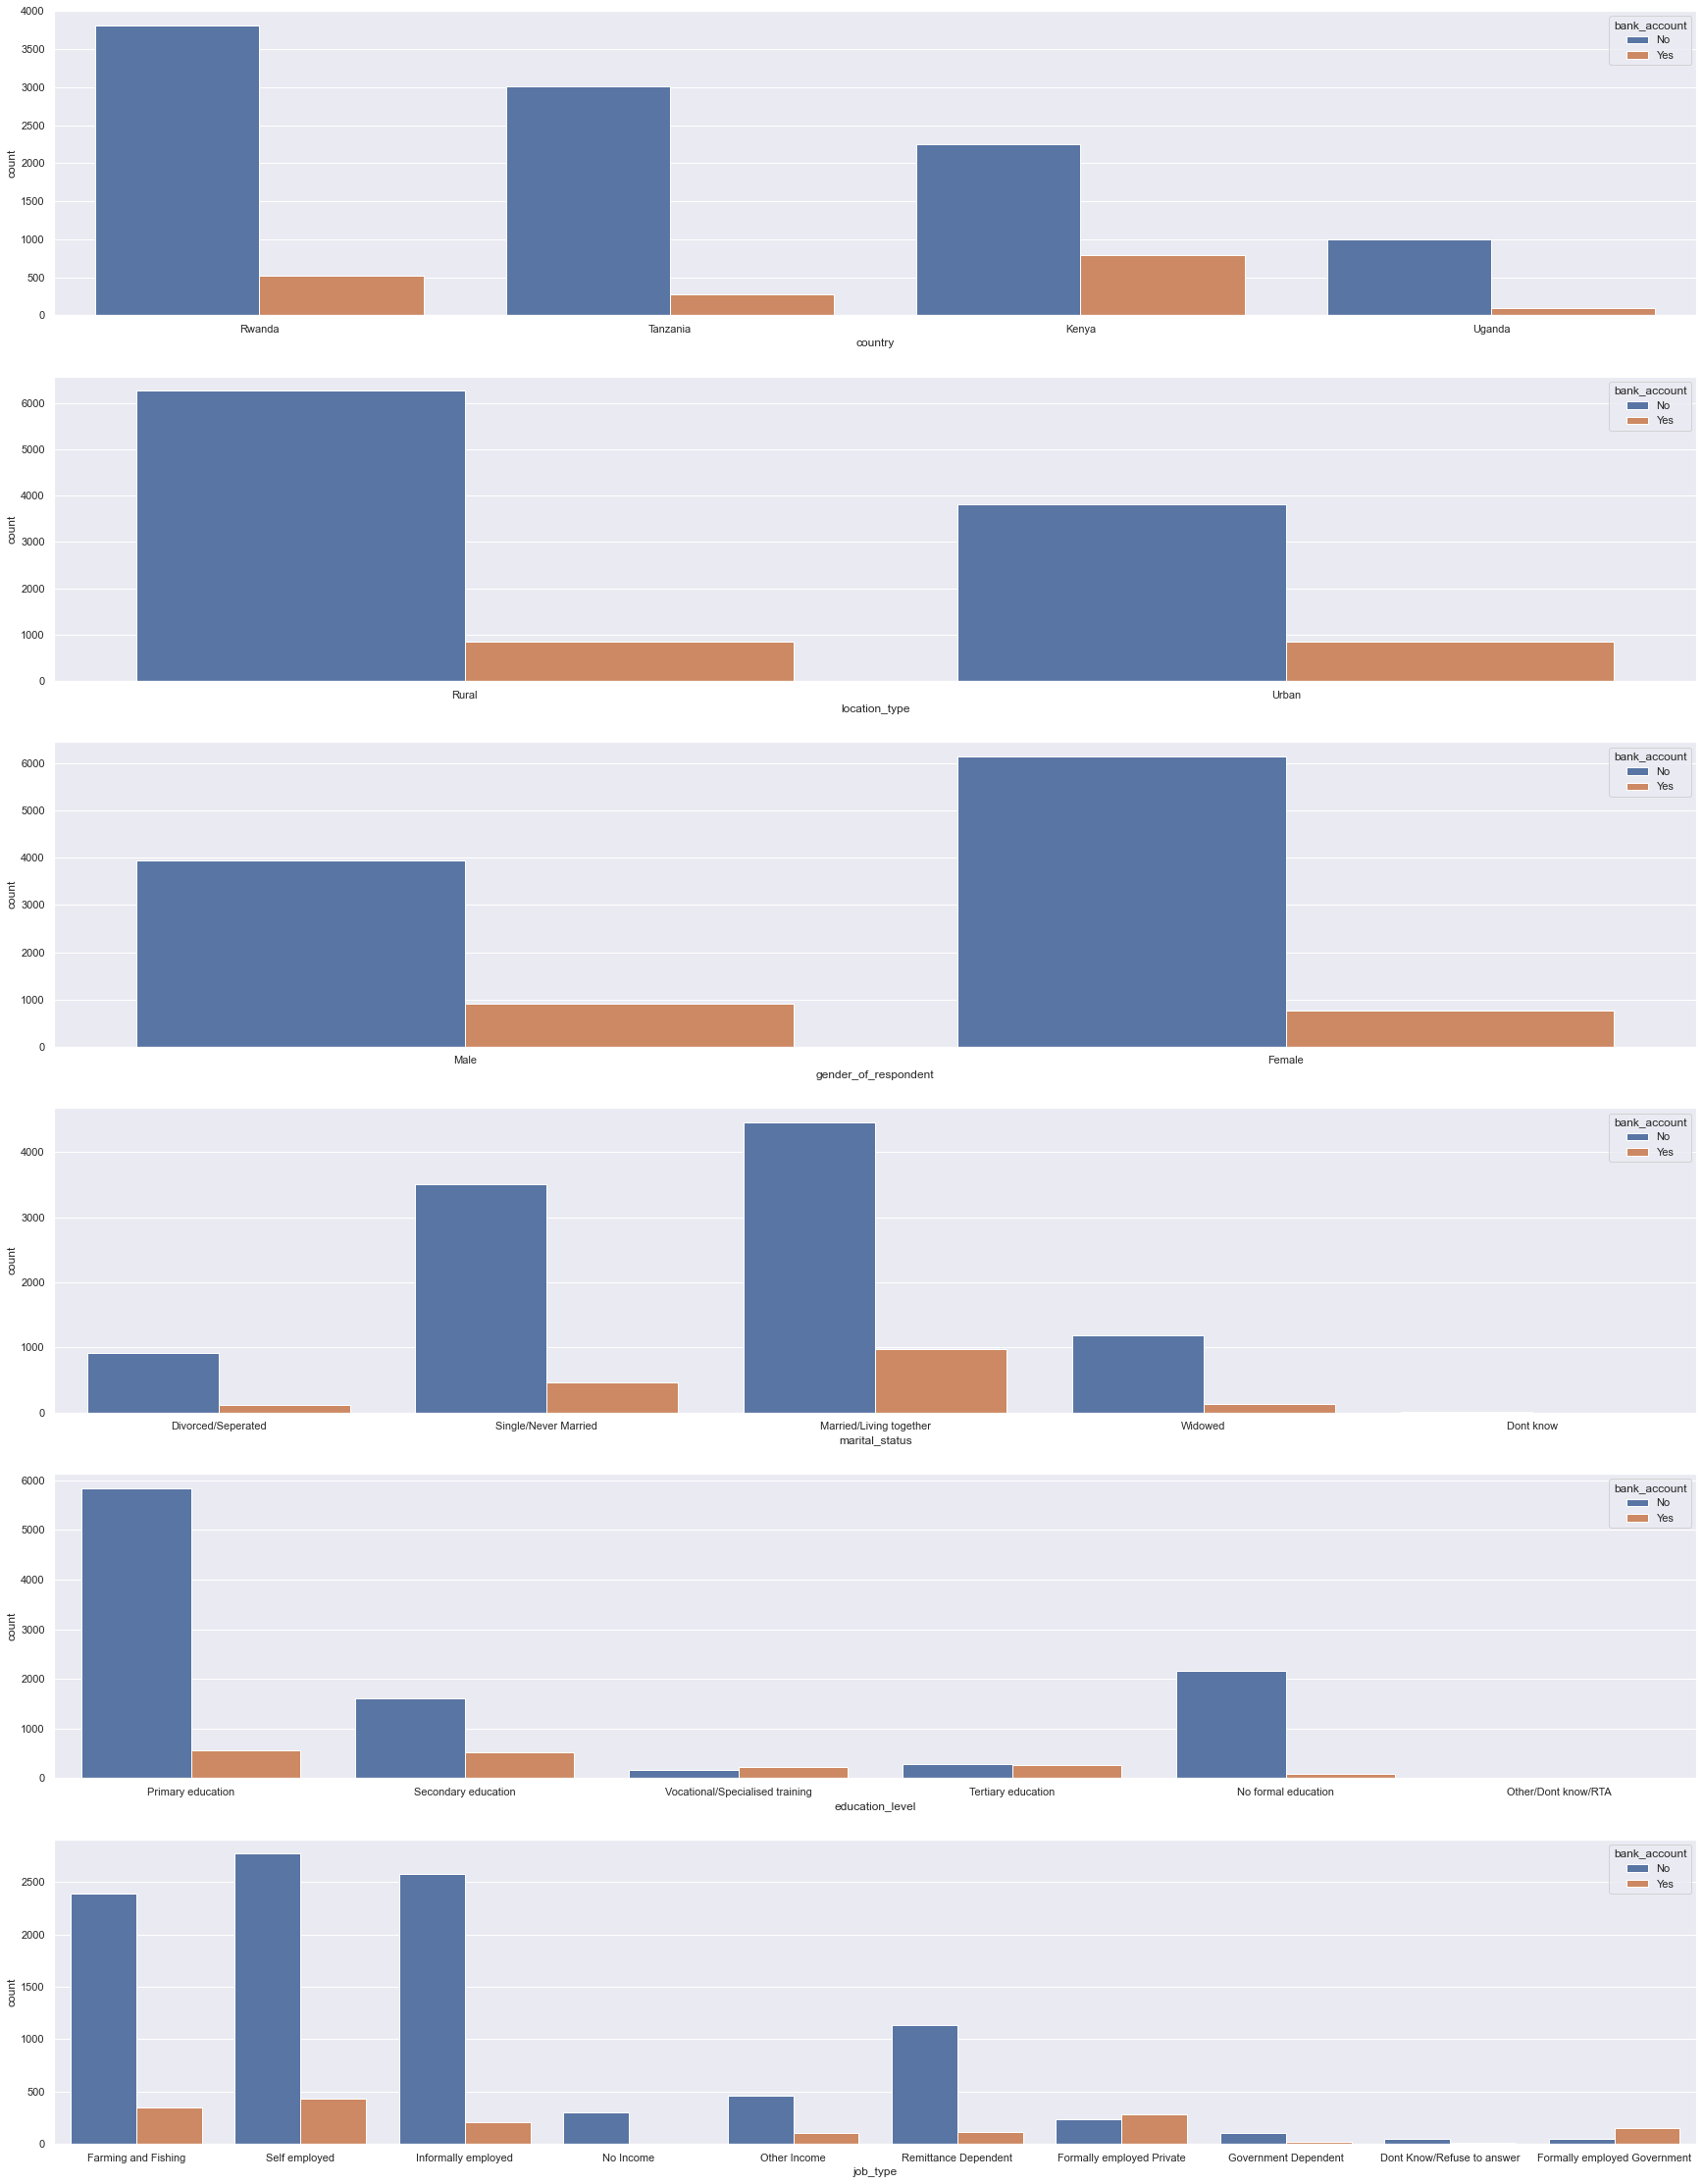

In [32]:
fig, ax = plt.subplots(6, 1, figsize=(30, 40))
sns.countplot(x='country',hue = 'bank_account', data = df4, ax=ax[0])
sns.countplot(x='location_type', hue = 'bank_account',data = df4, ax=ax[1])
sns.countplot(x='gender_of_respondent', hue = 'bank_account',data = df4, ax=ax[2])
sns.countplot(x='marital_status', hue = 'bank_account',data = df4, ax=ax[3])
sns.countplot(x='education_level', hue = 'bank_account', data = df4, ax = ax[4])
sns.countplot(x='job_type', hue = 'bank_account', data = df4, ax = ax[5]);

### 4.2. Bivariadas

**H1.** Os países desenvolvidos tem 10% a mais de contas digitais  

Sem dados para concluir o teste

**H2.** Zonas urbanas tem 50% a mais de contas digitais do que zonas rurais  

**FALSO** - O tipo de localização mostra uma igualdade entre os valores.

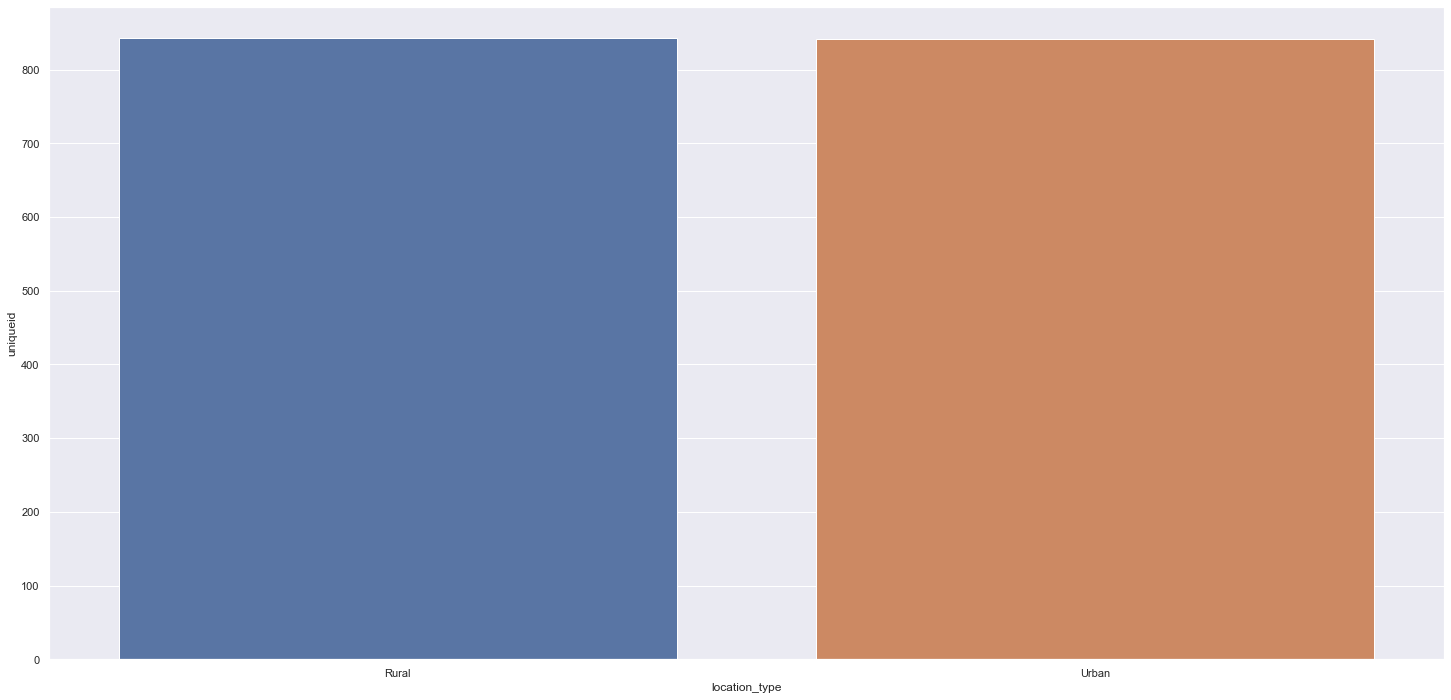

In [33]:
graph = df4[df1['bank_account']=='Yes'][['uniqueid','location_type']].groupby('location_type').count().reset_index()
sns.barplot( data = graph, x= 'location_type', y= 'uniqueid');

**H3.** 80% das pessoas que possuem celular e internet tem conta digital  

**FALSO** - Apenas 16.32% das pessoas que possuem celular também possuem conta digital.  
Entretanto, não temos indícios de posse de internet pelos usuários. Portanto, a conclusão é baseada apenas no celular.

In [34]:
h3 = df4[df4['cellphone_access']=='Yes'][['bank_account','uniqueid']].groupby('bank_account').count().reset_index()
yes = float(h3[h3['bank_account']== 'Yes']['uniqueid'])
percent = yes/total*100
print(f'Apenas {percent:.2f}% das pessoas que possuem celular, também possuem conta digital')

account = df4[df4['bank_account'] == 'Yes']['uniqueid'].count()
account_cell = df4[(df4['bank_account'] == 'Yes') & (df4['cellphone_access']=='Yes')]['uniqueid'].count()
percent_ = account_cell/account*100
print(f'\n{percent_:.2f}% das pessoas que possuem conta também possuem celular')

NameError: name 'total' is not defined

**H4.** A quantidade de contas de pessoas com ensino superior é maior em média do que as demais  

**FALSO** - A maior proporção das contas digitais está no vocational/specialised training

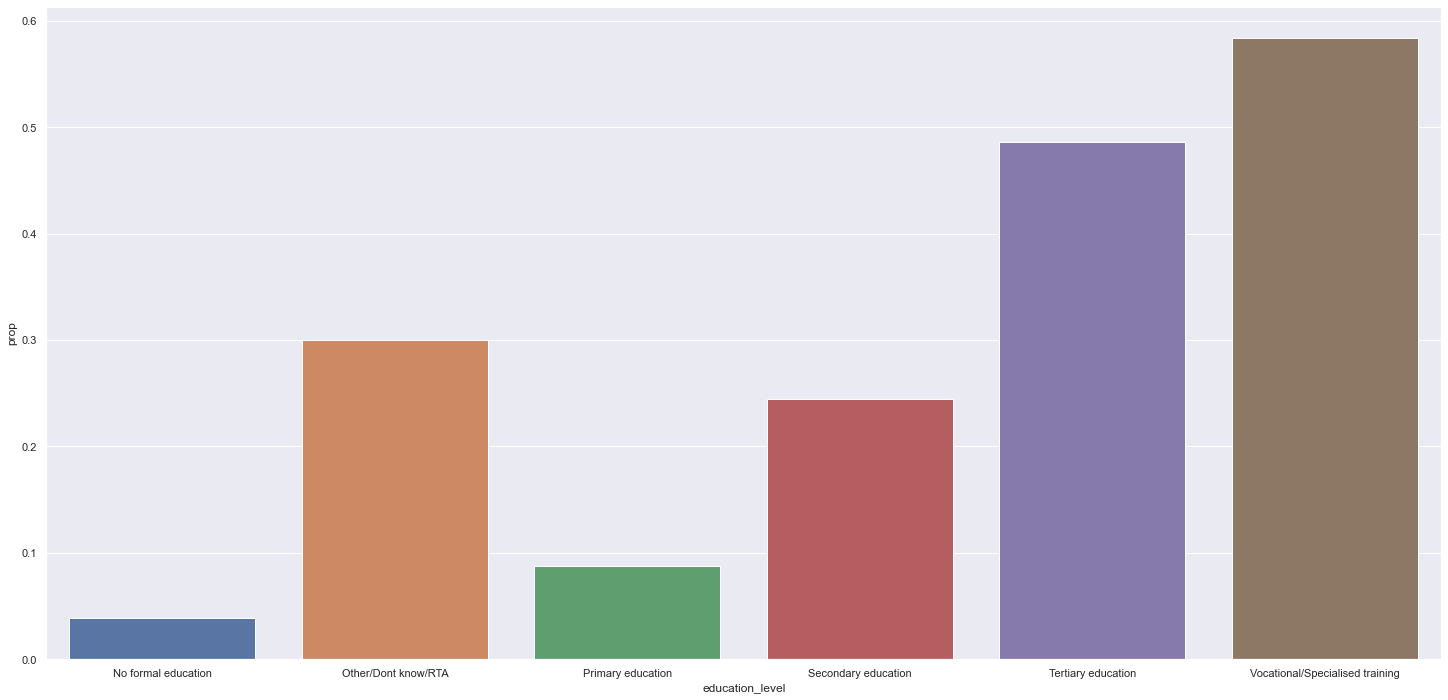

In [ ]:
# contar a quantidade de yes de cada nível de escolaridade
# fazer a divisão do yes pelo total do nível de escolaridade

education_yes = df4.loc[df4['bank_account'] == 'Yes', ['education_level', 'bank_account']].groupby('education_level').count().reset_index()
education_total = df4[['education_level', 'bank_account']].groupby('education_level').count().reset_index()
education = pd.merge(education_yes, education_total, on='education_level', how='inner')
education['prop'] = education.apply(lambda x: x['bank_account_x'] / x['bank_account_y'], axis=1)
sns.barplot(data=education, x='education_level', y='prop');

**H5.** Pessoas entre 18 e 40 anos constituem 85% da base de contas digitais  

**FALSO** - Pessoas na faixa de 18 a 40 anos, compõem 61% da base de contas digitais.

In [ ]:
total_ = df4[df4['bank_account']=='Yes']['uniqueid'].count()
age = df4[(df4['bank_account']=='Yes') & ((df1['age_of_respondent'] >= 18 ) & (df4['age_of_respondent'] <= 40))]['uniqueid'].count()
percent = age/total_*100
print(f'A quantidade de pessoas entre 18 e 40 anos que possuem conta representam {percent:.2f}%')

A quantidade de pessoas entre 18 e 40 anos que possuem conta representam 60.71%


**H6.** Mulheres são a maioria entre as contas digitais abertas  

**FALSO** - De um total de 1685 de contas digitais, 54.60% são de homens

In [ ]:
account = df1[df1['bank_account'] == 'No'][['uniqueid','gender_of_respondent' ]].groupby('gender_of_respondent').count().reset_index()
male = int(account[account['gender_of_respondent']=='Male']['uniqueid'])
female = int(account[account['gender_of_respondent']=='Female']['uniqueid'])
print(f'De um total de {male+female} de contas digitais, {male/(male+female)*100:.2f}% são de homens')

De um total de 10077 de contas digitais, 39.10% são de homens


**H7.** Pessoas acima dos 60 anos mesmo com acesso ao celular não possuem conta digital  

In [35]:
plus60_b_acc = df1.loc[(df1['age_of_respondent'] > 60) & (df1['cellphone_access'] == 'Yes') & (df1['bank_account'] == 'Yes'), ['uniqueid', 'age_of_respondent', 'cellphone_access', 'bank_account']].shape[0]

print(f'Falso. {plus60_b_acc} respondentes com idade superior a 60 e que possuem celular possuem conta em banco.')

Falso. 145 respondentes com idade superior a 60 e que possuem celular possuem conta em banco.


**H8.** 95% das pessoas sem trabalho não possuem conta digital  

In [36]:
#print(df1['job_type'].unique())

df_drop_job = df1[~(df1['job_type'] == 'Dont Know/Refuse to answer')]

total = df_drop_job.shape[0]

print(total)

yes = df_drop_job[(df_drop_job['job_type'] == 'No Income') & (df_drop_job['bank_account'] == 'Yes')].shape[0]

print(yes)

percent = np.round(yes/total*100, 2)

print(f' Verdadeiro. {100 - percent}% das pessoas sem trabalho não possuem conta em banco ')

11703
5
 Verdadeiro. 99.96% das pessoas sem trabalho não possuem conta em banco 


**H9.** 100% dos chefes de família possuem conta digital

In [37]:
#print(df1['relationship_with_head'].unique())

hoh_total = df1[df1['relationship_with_head'] == 'Head of Household'].shape[0]

hoh_yes = df1[(df1['relationship_with_head'] == 'Head of Household') & (df1['bank_account'] == 'Yes')].shape[0]

percent_hoh_yes = np.round(hoh_yes/hoh_total*100, 2)

print(f' Falso. Apenas {percent_hoh_yes}% dos chefes de família possuem conta em banco')

 Falso. Apenas 17.98% dos chefes de família possuem conta em banco


### 4.3. Multivariadas

## 5. Preparação dos Dados

In [ ]:
df5 = df4.copy()

In [ ]:
# análise de frequência

# country
df5['country'] = freq_analysis(df5, 'country')

# location_type
df5['location_type'] = freq_analysis(df5, 'location_type')

# cellphone_access
df5['cellphone_access'] = freq_analysis(df5, 'cellphone_access')

# gender_of_respondent
df5['gender_of_respondent'] = freq_analysis(df5, 'gender_of_respondent')

# relationship_with_head
df5['relationship_with_head'] = freq_analysis(df5, 'relationship_with_head')

# marital_status
df5['marital_status'] = freq_analysis(df5, 'marital_status')

# education_level
df5['education_level'] = freq_analysis(df5, 'education_level')

# job_type
df5['job_type'] = freq_analysis(df5, 'job_type')

# bank_account
df5['bank_account'] = df5['bank_account'].apply(lambda x: 1 if x == 'Yes' else 0)

df5.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,4335,2016,uniqueid_4858,7100,8786,6,45,4860,6358,1034,6408,2732,Rwanda_uniqueid_4858,0
1,3288,2017,uniqueid_3015,4662,2976,4,33,6902,6358,3970,6408,3207,Tanzania_uniqueid_3015,0
2,4335,2016,uniqueid_103,7100,8786,7,43,4860,6358,5433,2129,2732,Rwanda_uniqueid_103,0
3,4335,2016,uniqueid_4582,7100,2976,6,35,6902,6358,5433,6408,2732,Rwanda_uniqueid_4582,0
4,3288,2017,uniqueid_2854,4662,8786,2,30,4860,6358,3970,6408,2788,Tanzania_uniqueid_2854,0


In [ ]:
df5['country'] = pp.MinMaxScaler().fit_transform(df5[['country']].values)
df5['year'] = pp.MinMaxScaler().fit_transform(df5[['year']].values)
df5['location_type'] = pp.MinMaxScaler().fit_transform(df5[['location_type']].values)
df5['cellphone_access'] = pp.MinMaxScaler().fit_transform(df5[['cellphone_access']].values)
df5['household_size'] = pp.MinMaxScaler().fit_transform(df5[['household_size']].values)
df5['age_of_respondent'] = pp.MinMaxScaler().fit_transform(df5[['age_of_respondent']].values)
df5['gender_of_respondent'] = pp.MinMaxScaler().fit_transform(df5[['gender_of_respondent']].values)
df5['relationship_with_head'] = pp.MinMaxScaler().fit_transform(df5[['relationship_with_head']].values)
df5['marital_status'] = pp.MinMaxScaler().fit_transform(df5[['marital_status']].values)
df5['education_level'] = pp.MinMaxScaler().fit_transform(df5[['education_level']].values)
df5['job_type'] = pp.MinMaxScaler().fit_transform(df5[['job_type']].values)

### 5.1. Reescala dos Dados

## 6. Seleção de Features

In [ ]:
df6 = df5.copy()

### 6.1. Separação de Treino e Teste

In [ ]:
df6.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,uid,bank_account
0,1.000000,0.0,uniqueid_4858,1.0,1.0,0.25,0.345238,0.0,1.0,0.189722,1.00000,0.849111,Rwanda_uniqueid_4858,0
1,0.677648,0.5,uniqueid_3015,0.0,0.0,0.15,0.202381,1.0,1.0,0.730521,1.00000,1.000000,Tanzania_uniqueid_3015,0
2,1.000000,0.0,uniqueid_103,1.0,1.0,0.30,0.321429,0.0,1.0,1.000000,0.33015,0.849111,Rwanda_uniqueid_103,0
3,1.000000,0.0,uniqueid_4582,1.0,0.0,0.25,0.226190,1.0,1.0,1.000000,1.00000,0.849111,Rwanda_uniqueid_4582,0
4,0.677648,0.5,uniqueid_2854,0.0,1.0,0.05,0.166667,0.0,1.0,0.730521,1.00000,0.866900,Tanzania_uniqueid_2854,0


In [ ]:
X = df6.drop(['uniqueid','uid','bank_account'],axis=1)
y = df6['bank_account']

x_train, x_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.3, random_state=42)

## 7. Construção do Modelo

In [ ]:
score_list = {}
models_f1 = {}

k_fold = 10

### 7.1. Random Forest Classifier

In [ ]:
# criar o modelo
rfc_model = ensemble.RandomForestClassifier(random_state=42)

# treinar o modelo
rfc_model.fit(x_train, y_train)

# fazer a predição
yhat_rfc = rfc_model.predict(x_test)

# calcula a performance
models_f1['Random Forest'] = metrics.f1_score(y_test, yhat_rfc)

In [ ]:
score = ms.cross_val_score(rfc_model,X,y,scoring='f1',cv=k_fold)
score_list['Random Forest'] = np.mean(score)

## 7.2 Logistic Regression

In [ ]:
# criar o modelo
logistic_model = linear_model.LogisticRegression()

# treinar o modelo
logistic_model.fit(x_train, y_train)

# fazer a predição
yhat_logistic = logistic_model.predict(x_test)

# calcula a performance
models_f1['Logistic Regression'] = metrics.f1_score(y_test, yhat_logistic)

In [ ]:
score = ms.cross_val_score(logistic_model,X,y,scoring='f1',cv=k_fold)
score_list['Logistic Regression']=np.mean(score)

## 7.3 Support Vector Machine

In [ ]:
# criar o modelo
svm_model = SVC()

# treinar o modelo
svm_model.fit(x_train, y_train)

# fazer a predição
yhat_svm = svm_model.predict(x_test)

# calcula a performance
models_f1['SVM'] = metrics.f1_score(y_test, yhat_svm)

In [ ]:
score = ms.cross_val_score(svm_model,X,y,scoring='f1',cv=k_fold)
score_list['SVM']=np.mean(score)

## 7.4 KNN

In [ ]:
# criar o modelo
knn_model = KNeighborsClassifier()

# treinar o modelo
knn_model.fit(x_train, y_train)

# fazer a predição
yhat_knn = knn_model.predict(x_test)

# calcula a performance
models_f1['KNN'] = metrics.f1_score(y_test, yhat_knn)

In [ ]:
score = ms.cross_val_score(knn_model,X,y,scoring='f1',cv=k_fold)
score_list['KNN']=np.mean(score)

## 8. Avaliação do Modelo

In [ ]:
models_f1

{'Random Forest': 0.4309927360774819,
 'Logistic Regression': 0.30387596899224806,
 'SVM': 0.2916666666666667,
 'KNN': 0.4168797953964194}

In [ ]:
score_list

{'Random Forest': 0.43730310917946413,
 'Logistic Regression': 0.3169443271918454,
 'SVM': 0.3264722477786753,
 'KNN': 0.42815759142999543}

## 9. Fine Tunning

## 10. Output da Submissão

In [ ]:
x_test.head()

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
3717,1.000000,0.0,1.0,1.0,0.25,0.380952,1.0,0.510051,1.000000,0.000000,0.866900
11036,1.000000,0.0,0.0,0.0,0.10,0.130952,1.0,0.510051,1.000000,0.347527,0.144536
2088,0.677648,0.5,0.0,0.0,0.15,0.190476,1.0,0.510051,0.730521,1.000000,0.079733
1399,0.000000,1.0,1.0,0.0,0.10,0.035714,1.0,0.510051,1.000000,1.000000,1.000000
1178,0.677648,0.5,0.0,1.0,0.05,0.238095,0.0,1.000000,0.730521,1.000000,1.000000


In [ ]:
y_test[0:5]

3717     0
11036    0
2088     0
1399     0
1178     0
Name: bank_account, dtype: int64